<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [56]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import rbf_kernel
from tqdm import tqdm
import matplotlib.pyplot as plt

In [47]:
def decision_function(model,X_cv):
    higher_dim_product= rbf_kernel(model.support_vectors_,X_cv,gamma=0.001) # Cant do direct dot product
    weighted_sum = np.dot(model.dual_coef_,higher_dim_product)+ model.intercept_
    return weighted_sum

In [8]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
X_ ,X_test,y_,y_test = train_test_split(X,y,test_size=0.2)
X_train,X_cv,y_train,y_cv = train_test_split(X_,y_,test_size=0.25)
model = SVC(gamma = 0.001, C=100)
model.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

In [48]:
model.intercept_

array([7.67624715])

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [32]:
# you can write your code here
y_model_cv = model.decision_function(X_cv)

In [49]:
y_custom_cv = decision_function(model,X_cv)

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [70]:
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    w = np.zeros(row_vector.shape)
    b = 0
    return w,b

def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    return 1/(1+np.exp(-z)) 

def logloss(y_true,y_pred):
    ''' Return logloss once'''
    if len(y_true) == 0 or len(y_pred) == 0:
        return -1
    loss = -1*np.sum(np.log10(y_pred)*y_true + (1-y_true)*np.log10(1-y_pred))/len(y_true)
    return loss

def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x*(y - sigmoid(np.dot(w,x)+b)) - alpha*w/N
    return dw

def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    db = (y - sigmoid(np.dot(w,x)+b))
    return db

def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will learn weights and biases of logistic regression'''
    
    w,b = initialize_weights(X_train[0])    
    train_loss = []
    test_loss = []
    w,b = initialize_weights(X_train[0]) 
    
    for i in tqdm(range(epochs)):
      
        for i in range(X_train.shape[0]):# No rows is shape 0 
            #compute gradient w.r.to w (call the gradient_dw() function)
            dw = gradient_dw(X_train[i],y_train[i],w,b,alpha,X_train.shape[1])
            #compute gradient w.r.to b (call the gradient_db() function)
            db = gradient_db(X_train[i],y_train[i],w,b)
            #update w, b
            w += dw*eta0
            b += db*eta0
        #After each epoch collect train and test error 
        pred_train = pred(w,b,X_train)
        pred_test  = pred(w,b,X_test) 
        train_step_loss = logloss(y_train,pred_train)
        test_step_loss = logloss(y_test,pred_test)
        
        train_loss.append(train_step_loss)
        test_loss.append(test_step_loss)

    return w,b,train_loss,test_loss

def plotError(train_loss,test_loss):
    plt.plot([i for i in range(len(train_loss))],train_loss,color='blue',label="train error")
    plt.plot([i for i in range(len(train_loss))],test_loss,color='red',label="test error")
    plt.xlabel("Number of epochs ->")
    plt.ylabel("log-loss ->")
    plt.legend()
    plt.show()

In [104]:
def sigmoid_param(w,b,x):# here w and b are scalar
    return np.reciprocal(np.exp(w*x+b))

In [71]:
output_svm = y_custom_cv
y_modified = []
val,count = np.unique(y_cv,return_counts=True)
print(val,count)
Np = count[1]
Nv = count[0]

[0 1] [704 296]


In [72]:
y_modified = np.array([ 1/(Nv+2) if pt==0 else (Np+1)/(Np+2) for pt in y_cv ])

100%|██████████████████████████████████████████████| 30/30 [00:00<00:00, 53.11it/s]


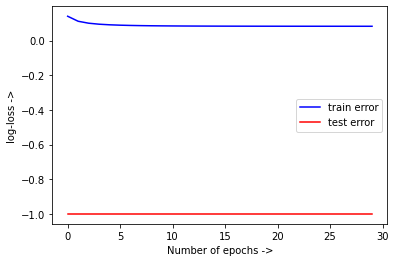

In [101]:
w,b,train_loss,test_loss = train(output_svm.T,y_modified,X_test=[],y_test=[],epochs=30,alpha=1e-03,eta0=1e-03)
plotError(train_loss,test_loss)

In [102]:
w,b

(array([1.7159002]), -0.10368528946153298)

In [105]:
def output(X_test,w,b):
    svm_output = decision_function(model,X_test)
    return sigmoid_param(svm_output,w,b)

In [107]:
probablity_outputs = output(X_test,w,b)

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score

In [114]:
test = roc_curve(y_test, probablity_outputs[0])# this returns a list which is the order of [false_postive_rate,true_positive_rate,thresholds]
print("TEST AUC SCORE",roc_auc_score(y_test, probablity_outputs[0]))

TEST AUC SCORE 0.981723464095259


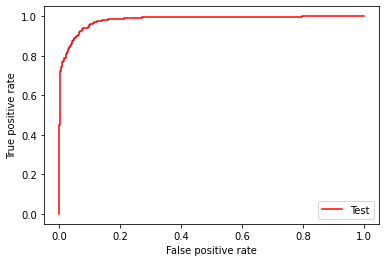

In [115]:
plt.plot(test[0],test[1],label="Test",color='red')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()